# Demo of package MALSpy

Author: Motoki Shiga (shiga_m _at_ gifu-u.ac.jp)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from malspy import SVD, PCA, VCA, NMF, NMF_SO, NMF_ARD_SO, BetaNMF, BetaNMF_SO
import malspy

malspy.__version__

'0.4.0'

# <span style="color: blue; ">Data analysis procedure</span>

The basic procedure of spectral imaging (SI) data analysis with malspy is similar to scikit-learn as follows: 

<b>1. Define a machine learning model with hyper-parameters. </b><br>
 All analysis methods require the number of chemical components before analysis. Try several values and compare traning results. 
 
 <span style="color: green; ">>></span> model = <span style="color: blue; ">'model_name'</span>(n_components, parameters)  <span style="color: green; "># n_comonents indicates 'the number of components'.</span>
    
    
<b>2. Train parameters such as spatial intensity distribution and spectra of chemical components.</b>

 <span style="color: green; ">>></span> model.fit(X)  <span style="color: green; "># X indicates 3D ndarray of shape = (x-axis, y-axis, chennel-axis)</span>


<b>3. Display the training result.</b>

 <span style="color: green; ">>></span> model.plot_spectra()  <span style="color: green; "># display spatial distributions of chemical components</span><br>
 <span style="color: green; ">>></span> model.imshow_component()  <span style="color: green; "># display spectra of chemical components</span>
<br><br> 
 
 The traning result is stored in model.C_ and model.S_. They can be accessed directly to output to files.
 To display a spatial intensity distrubution in model.C_, a rearangement is necessary. Example for the k-th component is<br>
 
 <span style="color: green; ">>></span> plt.figure()<br>
 <span style="color: green; ">>></span> im = np.reshape(model.C_[:, k], (model.num_x, model.num_y)) 
 <span style="color: green; "># num_x and num_y are the number of pixels along x- and y-axis respectively.</span> <br>
 <span style="color: green; ">>></span> plt.imshow(im)<br>
 <span style="color: green; ">>></span> plt.show()<br>
 
 
 # <span style="color: blue; "> Example of data Analysis </span>
 
 ## Load SI data

In [2]:
data = np.load('SI_data.npz')

print('Variables:', end=' ')
print(data.files)

# store observed data to variables 
X = data['X']
ev = data['ev']

print('The shape of X:', end=' ')
print(X.shape)

print('The shape of ev:', end=' ')
print(ev.shape)

Variables: ['X', 'ev']
The shape of X: (24, 22, 138)
The shape of ev: (138,)


## SVD (Singular Value Decomposition)

In [3]:
# definition of model
model_svd = SVD(n_components=2)

# training
# If someone has information of spectrum channel, input channel_vals for the channel values and unit_name.
model_svd.fit(X, channel_vals=ev.flatten(), unit_name='Energy Loss [eV]')

Training SVD...


SVD(n_components=2)

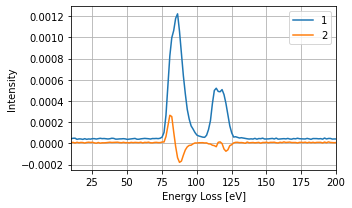

In [4]:
# plot decomposed spectra
model_svd.plot_spectra(figsize=(5,3), normalize=False)

# If someone wan to save figure to an image file, indicate filename.
# model_svd.plot_spectra(figsize=(5,3), normalize=False, filename='S_svd.png')

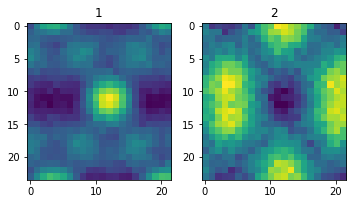

In [5]:
#  Identified component spatial density

model_svd.imshow_component(figsize=(5,5), figshape=(1,2))

# If someone wan to save figure to an image file, indicate filename.
# model_svd.imshow_component(figsize=(5,5), figshape=(2,3), filename='C_svd.png')

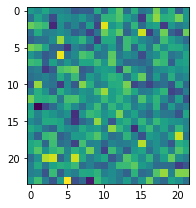

In [6]:
# Residual images (reconstruction error averaged over spectrum channel axis)
model_svd.imshow_residual_image(figsize=(3,3))

## PCA (Principal Component Analysis)

Training PCA...


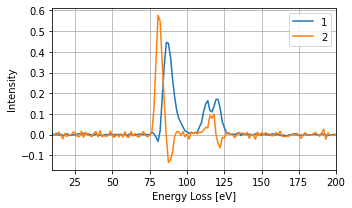

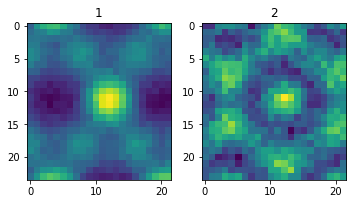

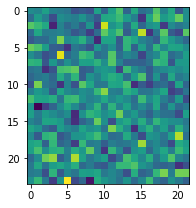

In [7]:
model_pca = PCA(n_components=2)
model_pca.fit(X, channel_vals=ev.flatten(), unit_name='Energy Loss [eV]')
model_pca.plot_spectra(figsize=(5,3), normalize=False)
model_pca.imshow_component(figsize=(5,5), figshape=(1,2))
model_pca.imshow_residual_image(figsize=(3,3))

# VCA (Vertex Component Analysis)

VCA requires dimension reduction before finding end-members (pure spectrs) .
Choose 'SVD' or 'PCA' for the procedure.

See the following paper for the details.<br>

> Jose' M. P. Nascimento, Jose' M. Bioucas, <br>
> "Vertex component analysis: a fast algorithm to unmix hyperspectral data", <br>
> <it>IEEE Trans. on Geoscience and Remote Sensing</it>, 43 (4), 898-910, 2005.<br>
> doi: 10.1109/TGRS.2005.844293

Runing dimension reduction by SVD...
Training VCA...


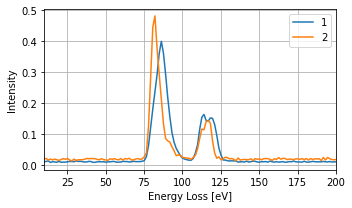

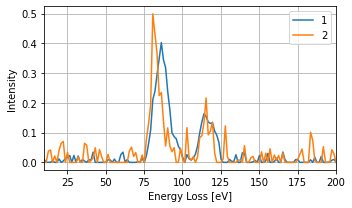

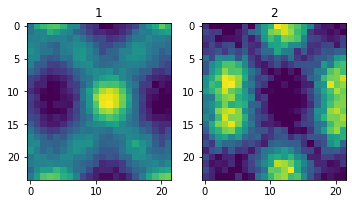

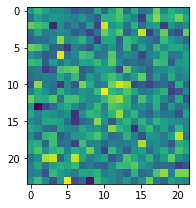

In [8]:
model_vca = VCA(n_components=2, proj_method='SVD')
model_vca.fit(X, channel_vals=ev.flatten(), unit_name='Energy Loss [eV]')
model_vca.plot_spectra(figsize=(5,3), normalize=True)
model_vca.plot_spectra_original(figsize=(5,3), normalize=True)
model_vca.imshow_component(figsize=(5,5), figshape=(1,2))
model_vca.imshow_residual_image(figsize=(3,3))

# NMF (Non-negative Matrix Factorization)

NMF iteratively update two low rank matrices from different initialized values.<br>
 <span style="color: blue; "><b>reps</b></span> is parameters to indicate the number of initializations.
 <span style="color: blue; "><b>max_itr</b></span> is to indicate the number of update in each training.


Training NMF model....
1th iteration of NMF algorithm
# updates: 11
2th iteration of NMF algorithm
# updates: 11
3th iteration of NMF algorithm
# updates: 11


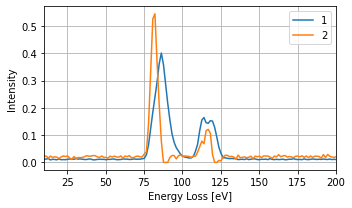

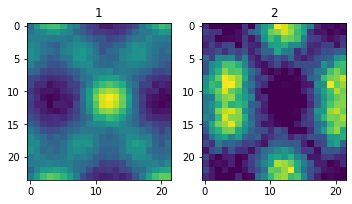

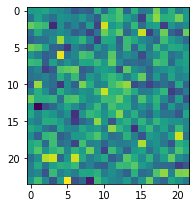

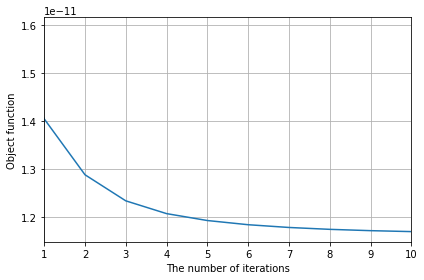

In [9]:
model_nmf = NMF(n_components=2, reps=3, max_itr=50)
model_nmf.fit(X, channel_vals=ev.flatten(), unit_name='Energy Loss [eV]')
model_nmf.plot_spectra(figsize=(5,3), normalize=True)
model_nmf.imshow_component(figsize=(5,5), figshape=(1,2))
model_nmf.imshow_residual_image(figsize=(3,3))
model_nmf.plot_object_fun()

# NMF_SO (NMF with Soft Orthogonality penalty)

The amount of penalty can be adjust by <span style="color: blue; "><b>wo</b></span>, which should be between 0 and 1.

See the following our paper for the details.<br>

> M. Shiga, K. Tatsumi, S. Muto, K. Tsuda, Y. Yamamoto, T. Mori, T. Tanji, <br>
> "Sparse Modeling of EELS and EDX Spectral Imaging Data by Nonnegative Matrix Factorization", <br>
> Ultramicroscopy, 170, 43-59, 2016.

Training NMF with soft orthogonal constraint....
1th iteration of NMF-SO algorithm
# updates: 11
2th iteration of NMF-SO algorithm
# updates: 11
3th iteration of NMF-SO algorithm
# updates: 11


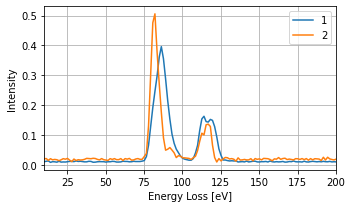

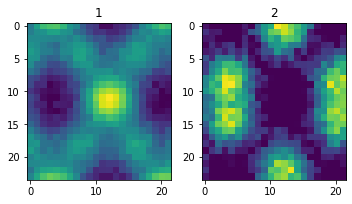

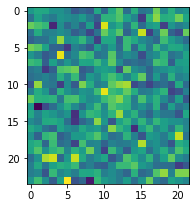

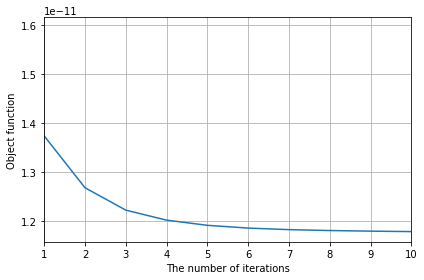

In [10]:
model_nmfso = NMF_SO(n_components=2, wo=0.05, reps=3, max_itr=50)
model_nmfso.fit(X, channel_vals=ev.flatten(), unit_name='Energy Loss [eV]')
model_nmfso.plot_spectra(figsize=(5,3), normalize=True)
model_nmfso.imshow_component(figsize=(5,5), figshape=(1,2))
model_nmfso.imshow_residual_image(figsize=(3,3))
model_nmfso.plot_object_fun()

# NMF_ARD_SO<br> (NMF with Automatic Relevance Determination and SO penalty)

The ARD penalty by L1 penalty term is to automatically choose the number of component. 
The weight can be also trained from given data.

See  our paper for the details.<br>

> M. Shiga, K. Tatsumi, S. Muto, K. Tsuda, Y. Yamamoto, T. Mori, T. Tanji, <br>
> "Sparse Modeling of EELS and EDX Spectral Imaging Data by Nonnegative Matrix Factorization", <br>
> Ultramicroscopy, 170, 43-59, 2016.

Training NMF with ARD and soft orthogonal constraint....
1th iteration of NMF-ARD-SO algorithm
# updates: 11
2th iteration of NMF-ARD-SO algorithm
# updates: 11
3th iteration of NMF-ARD-SO algorithm
# updates: 11
4th iteration of NMF-ARD-SO algorithm
# updates: 11
5th iteration of NMF-ARD-SO algorithm
# updates: 49


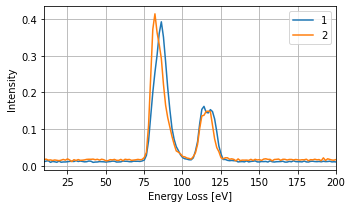

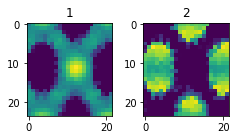

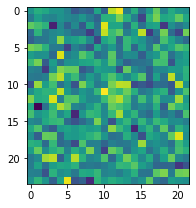

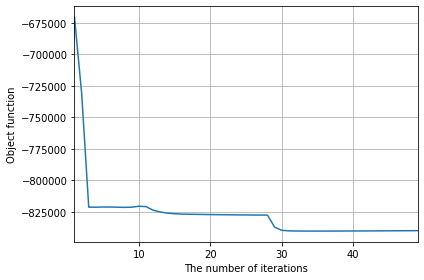

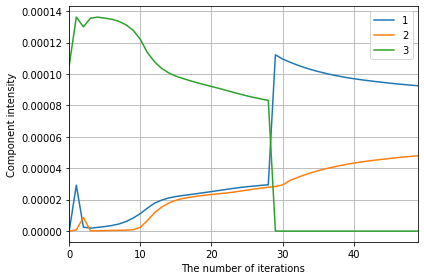

In [11]:
model_nmfard = NMF_ARD_SO(n_components=3, wo=0.5, reps=5, max_itr=50)
model_nmfard.fit(X, channel_vals=ev.flatten(), unit_name='Energy Loss [eV]')
model_nmfard.plot_spectra(figsize=(5,3), normalize=False)
model_nmfard.imshow_component(figsize=(5,5), figshape=(1,3))
model_nmfard.imshow_residual_image(figsize=(3,3))
model_nmfard.plot_object_fun()
model_nmfard.plot_ard()

## BetaNMF (NMF with Beta-divergence)

This NMF evaluates the reconstraction error by beta-divergence, which includes Euclidian distance (Gaussian noise model), KL-divergence (or Poisson noise model) and Itakura-Saito divergence. <span style="color: blue; "><b>beta</b></span>, which control the divergence function, should be between -1 and +1. Spetial cases are <br><br>
<b>beta=+1</b>:  Euclidian distance (Gaussian noise model)<br>
<b>beta=0</b>: KL-divergence (or Poisson noise model)<br>
<b>beta=-1</b>: Itakura-Saito divergence.

See the following papers for the details.<br>

> A. Cichocki , R. Zdunek , A.-H. Phan , S. Amari,
> Nonnegative Matrix and Tensor Factorizations: Applications to Exploratory Multi-way Data Analysis and Blind Source Separation,
> Wiley Publishing, 2009.
>
> K. Kimura, M. Kudo, Y. Tanaka,
> "A column-wise update algorithm for nonnegative matrix factorization in Bregman divergence with an orthogonal constraint",
> Machine Learning, 103(2), 285-306, 2016.
> doi: doi.org/10.1007/s10994-016-5553-0
>
> M. Shiga, S. Muto, 
> "Non-negative matrix factorization and its extensions for spectral image data analysis", 
> e-Journal of Surface Science and Nanotechnology, 2019. (Accepted)

Training NMF with beta-divergence....
1th iteration of BetaNMF algorithm
# updates: 23
2th iteration of BetaNMF algorithm
# updates: 22
3th iteration of BetaNMF algorithm
# updates: 24


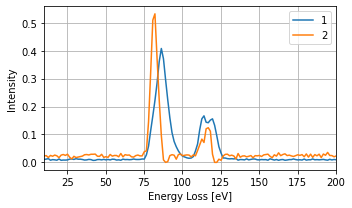

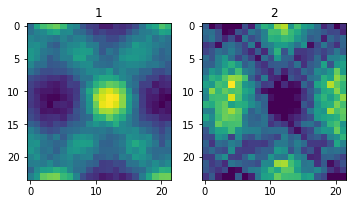

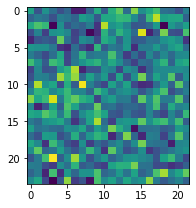

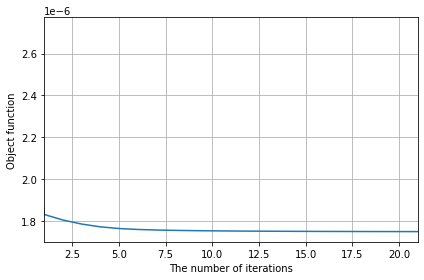

In [12]:
model_bnmf = BetaNMF(n_components=2, beta=0, reps=3, max_itr=50)
model_bnmf.fit(X, channel_vals=ev.flatten(), unit_name='Energy Loss [eV]')
model_bnmf.plot_spectra(figsize=(5,3), normalize=True)
model_bnmf.imshow_component(figsize=(5,5), figshape=(1,2))
model_bnmf.imshow_residual_image(figsize=(3,3))
model_bnmf.plot_object_fun()

## BetaNMF_SO (BetaNMF with Soft Orthogonality penalty)

This model is a generalization of NMF_SO with beta-divergence.
See our paper for the details.<br>

> M. Shiga, S. Muto, 
> "Non-negative matrix factorization and its extensions for spectral image data analysis", 
> e-Journal of Surface Science and Nanotechnology, 2019. (Accepted)

Training NMF with beta-divergence and soft orthogonality....
1th iteration of BetaNMF_SO algorithm
# updates: 19
2th iteration of BetaNMF_SO algorithm
# updates: 49
3th iteration of BetaNMF_SO algorithm
# updates: 49


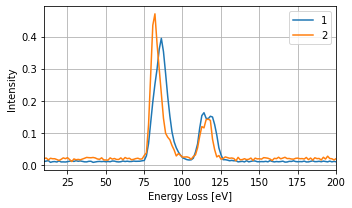

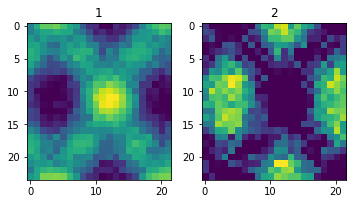

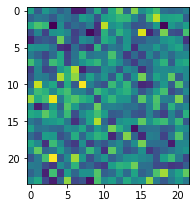

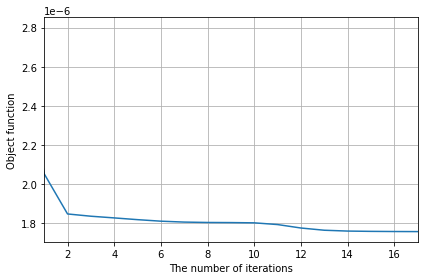

In [13]:
model_bnmfso = BetaNMF_SO(n_components=2, beta=0, wo=0.1, reps=3, max_itr=50)
model_bnmfso.fit(X, channel_vals=ev.flatten(), unit_name='Energy Loss [eV]')
model_bnmfso.plot_spectra(figsize=(5,3), normalize=True)
model_bnmfso.imshow_component(figsize=(5,5), figshape=(1,2))
model_bnmfso.imshow_residual_image(figsize=(3,3))
model_bnmfso.plot_object_fun()